In [1]:
!nvidia-smi

Tue May 14 13:03:38 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  On   | 00000000:07:00.0 Off |                   On |
| N/A   23C    P0    43W / 400W |     26MiB / 40536MiB |     N/A      Default |
|                               |                      |              Enabled |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA A100-SXM...  On   | 00000000:0F:00.0 Off |                   On |
| N/A   

In [2]:
import torch
torch.cuda.device_count()

1

In [3]:
torch.cuda.current_device()

0

In [4]:
torch.cuda.get_device_name(0)

'NVIDIA A100-SXM4-40GB MIG 1g.5gb'

In [5]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

from torch.utils.data import DataLoader, random_split
from torch.utils.data import Subset
from torch import nn

import torch.nn.functional as F
from torchvision.models import resnet50, ResNet50_Weights
from torch.nn import Parameter

import matplotlib.pyplot as plt
import math

import numpy as np
import pandas as pd

from PIL import Image
import pathlib
from pathlib import Path

import os
import zipfile

from tqdm.auto import tqdm

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [2]:
data_path = Path("celeba_identity_dataset/")

image_path = data_path
train_dir = data_path / "train"

train_dir

NameError: name 'Path' is not defined

In [1]:
from PIL import Image
import random
#random.seed(42)

image_path_list = list(train_dir.glob("*/*.jpg"))

print(len(image_path_list))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

#random_image_path,image_class ,img.height,img.width
img

NameError: name 'train_dir' is not defined

In [9]:
import os
def walk_through_dir(dir_path):
  for dirpath,dirnames,filenames in os.walk(dir_path):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images")

walk_through_dir("celeba_identity_dataset/train")

there are 10133 directories and 0 images
there are 0 directories and 5 images
there are 0 directories and 1 images
there are 0 directories and 18 images
there are 0 directories and 21 images
there are 0 directories and 18 images
there are 0 directories and 9 images
there are 0 directories and 19 images
there are 0 directories and 17 images
there are 0 directories and 1 images
there are 0 directories and 18 images
there are 0 directories and 17 images
there are 0 directories and 18 images
there are 0 directories and 9 images
there are 0 directories and 27 images
there are 0 directories and 3 images
there are 0 directories and 27 images
there are 0 directories and 12 images
there are 0 directories and 22 images
there are 0 directories and 20 images
there are 0 directories and 11 images
there are 0 directories and 14 images
there are 0 directories and 27 images
there are 0 directories and 5 images
there are 0 directories and 27 images
there are 0 directories and 26 images
there are 0 dire

In [8]:
test_dir = data_path / "test"
test_dir

PosixPath('celeba_identity_dataset/test')

In [9]:
walk_through_dir("celeba_identity_dataset/test")

NameError: name 'walk_through_dir' is not defined

In [9]:
from PIL import Image
import random
#random.seed(42)

image_path_list = list(test_dir.glob("*/*.jpg"))

print(len(image_path_list))

23604


In [10]:
transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

train_data = datasets.ImageFolder(root=train_dir,transform=transform,target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,transform=transform,target_transform=None)

train_data,test_data

(Dataset ImageFolder
     Number of datapoints: 178754
     Root location: celeba_identity_dataset/train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 23604
     Root location: celeba_identity_dataset/test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
                ToTensor()
            ))

In [11]:
image, label = train_data[5]
image, label,

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.1804, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.1843, 0.0000, 0.0000],
          [0.3961, 0.3961, 0.3961,  ..., 0.1882, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.9333,  ..., 0.6902, 0.6902, 0.6863],
          [0.0000, 0.0000, 0.9216,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.9098,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.1098, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.1137, 0.0000, 0.0000],
          [0.2863, 0.2863, 0.2863,  ..., 0.1176, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.1255,  ..., 0.7098, 0.7098, 0.7059],
          [0.0000, 0.0000, 0.0902,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0667,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.0000,  ..., 0.0627, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0706, 0.0000, 0.0000],
          [0.2039, 0.2039, 0.2078,  ...,

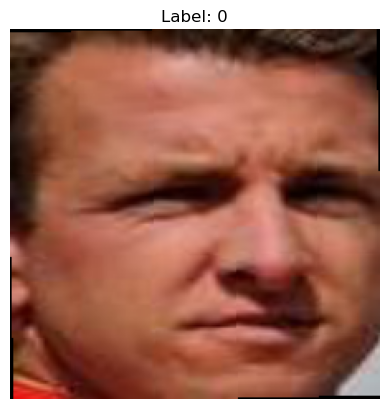

In [12]:
image = image.permute(1, 2, 0)

plt.imshow(image)
plt.title(f'Label: {label}')
plt.axis('off')  # Turn off axis labels
plt.show()

In [13]:

train_Dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

test_Dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

len(test_Dataloader),len(train_Dataloader)

(738, 5587)

In [14]:
class ArcFace(nn.Module):
    def __init__(self, feature_in, feature_out, margin=0.3, scale=64):
        super(ArcFace, self).__init__()
        self.feature_in = feature_in
        self.feature_out = feature_out
        self.scale = scale
        self.margin = margin

        # Use a pre-trained ResNet-50 as backbone
        self.resnet = resnet50(weights=ResNet50_Weights.IMAGENET1K_V2)

        # Remove the last fully connected layer and pooling layers
        self.resnet = nn.Sequential(*list(self.resnet.children())[:-2])

        # Add a new fully connected layer
        # Add a new fully connected layer
        self.fc = nn.Linear(2048, self.feature_in)
        nn.init.xavier_normal_(self.fc.weight)
        nn.init.constant_(self.fc.bias, 0)

        # Add a batch normalization layer
        self.bn = nn.BatchNorm1d(self.feature_in)

        # Add a weights tensor for ArcFace
        self.weights = nn.Parameter(torch.randn(self.feature_out, self.feature_in))
        nn.init.xavier_normal_(self.weights)

    def forward(self, x, targets):
        x = self.resnet(x)
        x = F.adaptive_avg_pool2d(x, (1, 1))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        x = self.bn(x)
        x = F.relu(x)

        # Normalize the input features and weights
        x = F.normalize(x, p=2, dim=1)
        weights = F.normalize(self.weights, p=2, dim=1)

        # Compute the cosine similarity
        cos_theta = F.linear(x, weights)

        # Apply the ArcFace margin
        arc_cos = torch.acos(cos_theta)
        M = F.one_hot(targets, num_classes=self.feature_out) * self.margin
        arc_cos += M
        cos_theta_2 = torch.cos(arc_cos)

        # Scale the logits
        logits = cos_theta_2 * self.scale

        return logits


# Example usage:
# model = ArcFace(feature_in=512, feature_out=num_classes)
# inputs = torch.randn((batch_size, 3, 224, 224))
# targets = torch.randint(0, num_classes, (batch_size,))
# outputs = model(inputs, targets)


In [15]:
model_1 = ArcFace(feature_in=512, feature_out=10177)
model_1 = model_1.to(device)
model_1 = nn.DataParallel(model_1)
model_1

DataParallel(
  (module): ArcFace(
    (resnet): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplace=True)
       

In [17]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), lr=0.01)

NameError: name 'model_1' is not defined

In [35]:
from tqdm.auto import tqdm

epochs = 20

results = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": []
}

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(train_Dataloader):
    model_1.train()

    X = X.to(device)
    y = y.to(device)

    output = model_1(X, y)

    loss = loss_fn(output, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()

    if batch%400 == 0:
      print(f"looked at {(batch+1) * len(X)}/{len(train_Dataloader.dataset)} samples")
      print(f"{train_acc} | {(batch+1) * len(X)}")

  train_loss /= len(train_Dataloader)
  train_acc = (train_acc/len(train_data))*100

  test_loss, test_acc = 0, 0

  model_1.eval()

  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_Dataloader):

      X_test = X_test.to(device)
      y_test = y_test.to(device)

      output2 = model_1(X_test, y_test)

      test_loss += loss_fn(output2,y_test).item()

      test_pred_labels = torch.argmax(torch.softmax(output2, dim=1), dim=1)
      test_acc += (test_pred_labels == y_test).sum().item()

      if batch%200 == 0:
        print(f"looked at {(batch+1) * len(X_test)}/{len(test_Dataloader.dataset)} samples")
        #print(test_pred_labels)
        #print(y_test)
        print(f"{test_acc} | {(batch+1) * len(X_test)}")

  test_loss /= len(test_Dataloader)
  test_acc = (test_acc/len(test_data))*100

  print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  train_Dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0
-----


OutOfMemoryError: CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacty of 4.75 GiB of which 19.50 MiB is free. Including non-PyTorch memory, this process has 4.72 GiB memory in use. Of the allocated memory 3.43 GiB is allocated by PyTorch, and 58.64 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [18]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "arcface_celeba_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1, f=MODEL_SAVE_PATH)

Saving model to: models/arcface_celeba_model.pth


In [19]:
def plot_loss_curves(results):
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


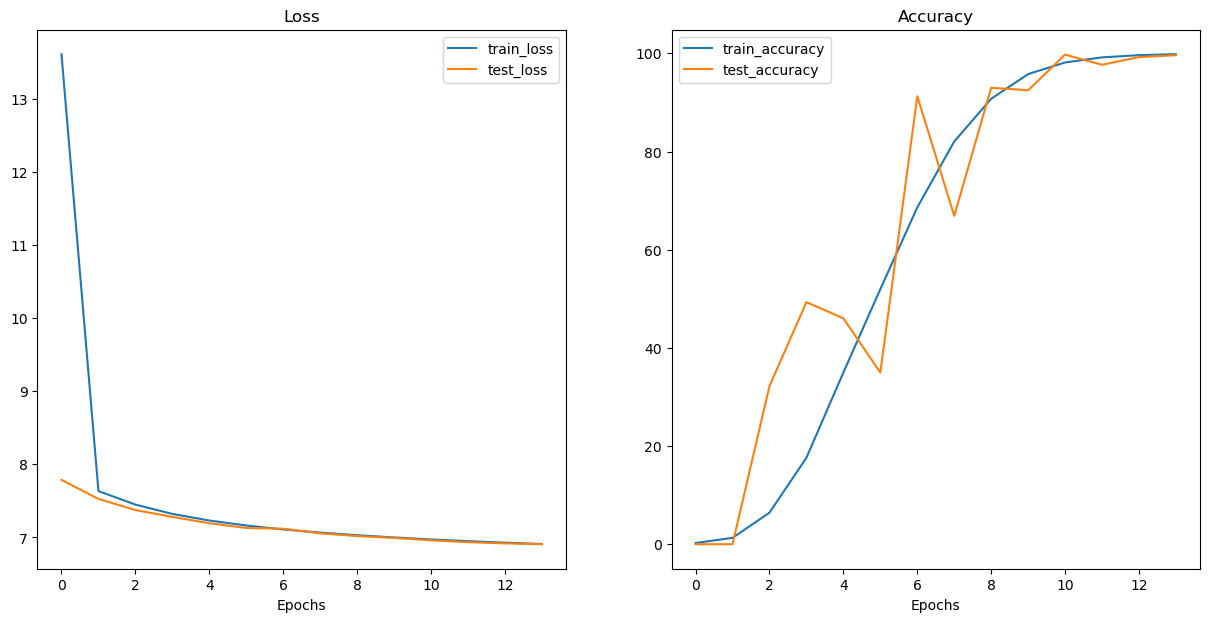

In [20]:
plot_loss_curves(results)

In [23]:
results['train_acc'],results['test_acc']

([0.2506237622654598,
  1.297313626548217,
  6.430065900623203,
  17.623661568412455,
  34.99222395023328,
  51.9658301352697,
  68.62559718943352,
  82.05410788010337,
  90.75657048233886,
  95.78415028474888,
  98.1505308972107,
  99.18771048480033,
  99.63916891370263,
  99.82993387560558],
 [0.0,
  0.0,
  32.21487883409592,
  49.32214878834096,
  46.021860701576,
  34.97288595153364,
  91.26842907981698,
  66.88696831045586,
  92.99694966954753,
  92.48856126080327,
  99.7542789357736,
  97.67412302999492,
  99.25012709710218,
  99.62294526351467])

In [1]:
loaded_model_2 = torch.load(f="models/arcface_celeba_model.pth")
loaded_model_2 = loaded_model_2.to(device)
loaded_model_2 = nn.DataParallel(loaded_model_2)
loaded_model_2

NameError: name 'torch' is not defined

In [20]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(loaded_model_2.parameters(), lr=0.01)

In [1]:
from tqdm.auto import tqdm

epochs = 10

results = {
    "train_loss": [],
    "train_acc": [],
    "test_loss": [],
    "test_acc": []
}

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_loss, train_acc = 0, 0
  for batch, (X,y) in enumerate(train_Dataloader):
    loaded_model_2.train()

    X = X.to(device)
    y = y.to(device)

    output = loaded_model_2(X, y)

    loss = loss_fn(output, y)
    train_loss += loss.item()

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    y_pred_class = torch.argmax(torch.softmax(output, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item()

    if batch%400 == 0:
      print(f"looked at {(batch+1) * len(X)}/{len(train_Dataloader.dataset)} samples")
      print(f"{train_acc} | {(batch+1) * len(X)}")

  train_loss /= len(train_Dataloader)
  train_acc = (train_acc/len(train_data))*100

  test_loss, test_acc = 0, 0

  loaded_model_2.eval()

  with torch.inference_mode():
    for batch, (X_test,y_test) in enumerate(test_Dataloader):

      X_test = X_test.to(device)
      y_test = y_test.to(device)

      output2 = loaded_model_2(X_test, y_test)

      test_loss += loss_fn(output2,y_test).item()

      test_pred_labels = torch.argmax(torch.softmax(output2, dim=1), dim=1)
      test_acc += (test_pred_labels == y_test).sum().item()

      if batch%200 == 0:
        print(f"looked at {(batch+1) * len(X_test)}/{len(test_Dataloader.dataset)} samples")
        #print(test_pred_labels)
        #print(y_test)
        print(f"{test_acc} | {(batch+1) * len(X_test)}")

  test_loss /= len(test_Dataloader)
  test_acc = (test_acc/len(test_data))*100

  print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )
  results["train_loss"].append(train_loss)
  results["train_acc"].append(train_acc)
  results["test_loss"].append(test_loss)
  results["test_acc"].append(test_acc)

  train_Dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-----


NameError: name 'train_Dataloader' is not defined